In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data_age = pd.read_csv('Crude suicide rates.csv')
data_age

,Country,Sex,80_above,70to79,60to69,50to59,40to49,30to39,20to29,10to19
0,Afghanistan,Both sexes,42.0,11.0,5.5,5.6,6.6,9.2,10.2,3.1
1,Afghanistan,Male,70.4,20.9,9.8,9.3,10.5,15.1,16.3,4.8
2,Afghanistan,Female,20.1,2.3,1.4,1.6,2.3,2.7,3.5,1.2
3,Albania,Both sexes,16.3,8.3,6.0,7.8,9.1,6.1,6.5,5.0
4,Albania,Male,23.2,11.9,8.1,11.4,13.5,8.8,6.3,3.1
...,...,...,...,...,...,...,...,...,...,...
544,Zambia,Male,152.1,79.0,38.7,27.3,17.0,13.3,12.3,3.9
545,Zambia,Female,31.2,26.4,16.0,11.2,6.9,4.6,4.2,1.6
546,Zimbabwe,Both sexes,205.7,81.5,41.3,29.4,19.2,13.7,11.3,4.6
547,Zimbabwe,Male,285.0,111.5,62.8,47.0,30.1,22.8,19.1,6.4


In [3]:
data_age.dtypes

Country       object
Sex           object
 80_above    float64
 70to79      float64
 60to69      float64
 50to59      float64
 40to49      float64
 30to39      float64
 20to29      float64
 10to19      float64
dtype: object

In [4]:
data_age.isnull().sum()

Country      0
Sex          0
 80_above    0
 70to79      0
 60to69      0
 50to59      0
 40to49      0
 30to39      0
 20to29      0
 10to19      0
dtype: int64

In [5]:
data_age.drop_duplicates(inplace=True)
data_age.shape

(549, 10)

In [6]:
data_age.replace([" Both sexes", " Male", " Female"], ["Both sexes", "Male", "Female"], inplace=True)
data_age

,Country,Sex,80_above,70to79,60to69,50to59,40to49,30to39,20to29,10to19
0,Afghanistan,Both sexes,42.0,11.0,5.5,5.6,6.6,9.2,10.2,3.1
1,Afghanistan,Male,70.4,20.9,9.8,9.3,10.5,15.1,16.3,4.8
2,Afghanistan,Female,20.1,2.3,1.4,1.6,2.3,2.7,3.5,1.2
3,Albania,Both sexes,16.3,8.3,6.0,7.8,9.1,6.1,6.5,5.0
4,Albania,Male,23.2,11.9,8.1,11.4,13.5,8.8,6.3,3.1
...,...,...,...,...,...,...,...,...,...,...
544,Zambia,Male,152.1,79.0,38.7,27.3,17.0,13.3,12.3,3.9
545,Zambia,Female,31.2,26.4,16.0,11.2,6.9,4.6,4.2,1.6
546,Zimbabwe,Both sexes,205.7,81.5,41.3,29.4,19.2,13.7,11.3,4.6
547,Zimbabwe,Male,285.0,111.5,62.8,47.0,30.1,22.8,19.1,6.4


In [7]:
data_age_no_country = data_age.drop('Country', axis=1)
data_age_no_country

,Sex,80_above,70to79,60to69,50to59,40to49,30to39,20to29,10to19
0,Both sexes,42.0,11.0,5.5,5.6,6.6,9.2,10.2,3.1
1,Male,70.4,20.9,9.8,9.3,10.5,15.1,16.3,4.8
2,Female,20.1,2.3,1.4,1.6,2.3,2.7,3.5,1.2
3,Both sexes,16.3,8.3,6.0,7.8,9.1,6.1,6.5,5.0
4,Male,23.2,11.9,8.1,11.4,13.5,8.8,6.3,3.1
...,...,...,...,...,...,...,...,...,...
544,Male,152.1,79.0,38.7,27.3,17.0,13.3,12.3,3.9
545,Female,31.2,26.4,16.0,11.2,6.9,4.6,4.2,1.6
546,Both sexes,205.7,81.5,41.3,29.4,19.2,13.7,11.3,4.6
547,Male,285.0,111.5,62.8,47.0,30.1,22.8,19.1,6.4


In [8]:
df_age = pd.DataFrame(data_age_no_country.groupby('Sex').mean())
df_age

,80_above,70to79,60to69,50to59,40to49,30to39,20to29,10to19
Sex,,,,,,,,
Both sexes,39.556831,24.925683,17.074863,14.586885,12.159563,10.921311,10.500546,4.092896
Female,23.695082,15.379235,9.971585,7.493443,5.622404,4.963934,5.042623,2.843169
Male,64.504372,37.505464,25.271038,22.149727,18.786339,16.801093,15.726776,5.289071


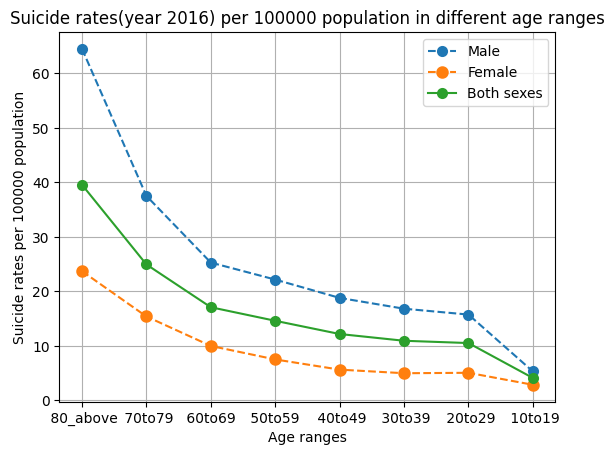

In [9]:
plt.title('Suicide rates(year 2016) per 100000 population in different age ranges')
plt.xlabel('Age ranges')
plt.ylabel('Suicide rates per 100000 population')
plt.plot(df_age.columns, df_age.loc['Male'], ls='--', marker='o', mew=2, label='Male')
plt.plot(df_age.columns, df_age.loc['Female'], ls='--', marker='o', mew=3, label='Female')
plt.plot(df_age.columns, df_age.loc['Both sexes'], ls='-', marker='o', mew=2, label='Both sexes')
plt.grid()
plt.legend()
plt.show()

In [10]:
both_sexes = data_age_no_country[data_age_no_country['Sex'] == 'Both sexes']
both_sexes

,Sex,80_above,70to79,60to69,50to59,40to49,30to39,20to29,10to19
0,Both sexes,42.0,11.0,5.5,5.6,6.6,9.2,10.2,3.1
3,Both sexes,16.3,8.3,6.0,7.8,9.1,6.1,6.5,5.0
6,Both sexes,9.4,5.6,4.2,4.1,4.7,5.3,4.2,1.3
9,Both sexes,63.5,42.1,23.8,14.8,7.0,5.4,6.6,2.6
12,Both sexes,0.0,0.0,8.1,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
534,Both sexes,8.9,7.1,5.7,4.6,4.0,4.6,5.4,3.0
537,Both sexes,20.9,16.6,14.8,8.3,7.7,10.3,9.0,1.8
540,Both sexes,13.1,9.7,8.3,9.1,12.2,17.5,17.7,4.5
543,Both sexes,79.7,48.9,25.8,18.7,11.8,8.9,8.3,2.8


In [11]:
both_sexes.drop('Sex', axis=1, inplace=True)
both_sexes

C:\Users\SLAYER\AppData\Local\Temp\ipykernel_6068\2858935569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  both_sexes.drop('Sex', axis=1, inplace=True)


,80_above,70to79,60to69,50to59,40to49,30to39,20to29,10to19
0,42.0,11.0,5.5,5.6,6.6,9.2,10.2,3.1
3,16.3,8.3,6.0,7.8,9.1,6.1,6.5,5.0
6,9.4,5.6,4.2,4.1,4.7,5.3,4.2,1.3
9,63.5,42.1,23.8,14.8,7.0,5.4,6.6,2.6
12,0.0,0.0,8.1,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
534,8.9,7.1,5.7,4.6,4.0,4.6,5.4,3.0
537,20.9,16.6,14.8,8.3,7.7,10.3,9.0,1.8
540,13.1,9.7,8.3,9.1,12.2,17.5,17.7,4.5
543,79.7,48.9,25.8,18.7,11.8,8.9,8.3,2.8


In [12]:
both_sexes_mean = both_sexes.mean()
both_sexes_mean

 80_above    39.556831
 70to79      24.925683
 60to69      17.074863
 50to59      14.586885
 40to49      12.159563
 30to39      10.921311
 20to29      10.500546
 10to19       4.092896
dtype: float64

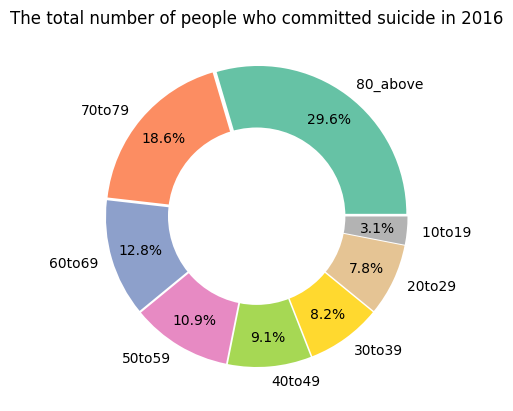

In [13]:
label = ['80_above', '70to79', '60to69', '50to59', '40to49', '30to39', '20to29', '10to19 ']
explode = (0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02)
plt.pie(both_sexes_mean, labels=label, explode=explode, autopct='%1.1f%%', colors=sns.color_palette('Set2'),
        pctdistance=0.80, )
hole = plt.Circle((0, 0), 0.6, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('The total number of people who committed suicide in 2016')
plt.show()